# CAO Point Analysis 



In [1]:
# for HTTP requests
import requests as rq 
# regular expressions 
import re
# reading and writing into csv
import csv
# dates and times
import datetime as dt 
# dataframes
import pandas as pd
# for plotting
import matplotlib.pyplot as plt
# Numerical arrays.
import numpy as np
# change the deafult size of the plot 
from pylab import rcParams

## 2021 Points courses


### Retrieving the data 

**The data for the analysis was collected from [CAO](http://www2.cao.ie/points/l8.php) website.** 

In [2]:
# making a HTTP request for a data to a webpage
resp = rq.get('http://www2.cao.ie/points/l8.php') 
resp

<Response [200]>

### Saving the original data set 

In [3]:
# get the current date and time
now = dt.datetime.now() 
print(now)

2021-12-04 22:49:33.666344


In [4]:
# create a file path to the original data
path2021 = "cao2021_" + now.strftime('%Y%m%d_%H%M%S') + ".csv"
print(path2021)

cao2021_20211204_224933.csv


### Selecting the relevant lines 

In [5]:
# compiling regular expression
re_course = re.compile(r'([A-Z]{2}[0-9]{3})  (.*?(?=[0-9]{3}))([0-9]{3,4})(\D*)([0-9]*|\D*)(\D*) *')    

In [6]:
# keep a track on the number of courses  
no_lines = 0

# open the csv file for writing
with open(path2021,'w') as f:
    writer=csv.writer(f, delimiter='\t',lineterminator='\n',)
    for line in resp.iter_lines(): # loop though the lines of the response
        if re_course.fullmatch(line.decode('CP1252')):# decode and match the relevant lines
            no_lines = no_lines + 1 # add the lines to the line counter 
            csv_file = re_course.sub(r'\1,\2,\3,\5', line.decode('CP1252')) # converting the lines into CSV style
            print(csv_file) # print the csv style line
            row = [csv_file]
            writer.writerow(row) # write row into a file

print("number of lines is {}".format(no_lines)) # print the number of lines 

AL801,Software Design for Virtual Reality and Gaming       ,300,
AL802,Software Design in Artificial Intelligence for Clo   ,313,
AL803,Software Design for Mobile Apps and Connected Devi   ,350,
AL805,Computer Engineering for Network Infrastructure      ,321,
AL810,Quantity Surveying                                   ,328,
AL820,Mechanical and Polymer Engineering                   ,327,
AL830,General Nursing                                      ,451,444
AL832,Mental Health Nursing                                ,440,431
AL835,Pharmacology                                         ,356,
AL836,Nutrition and Health Science                         ,346,
AL837,Sports Science with Exercise Physiology              ,357,
AL838,Biotechnology                                        ,324,
AL839,Microbiology                                         ,325,
AL840,Pharmaceutical Sciences                              ,346,
AL841,Athletic and Rehabilitation Therapy                  ,477,476
AL842,Bioveterin

In [7]:
# read the file and add the column names
df2021 = pd.read_csv(path2021, header= None, names = ['COURSE CODE', 'COURSE TITLE', 'R1 POINTS_21', 'R2 POINTS_21'], index_col=['COURSE CODE']) # set the index to course code 
courses2021_level8 = df2021
courses2021_level8

,COURSE TITLE,R1 POINTS_21,R2 POINTS_21
COURSE CODE,,,
AL801,Software Design for Virtual Reality and Gaming...,300,NaN
AL802,Software Design in Artificial Intelligence for...,313,NaN
AL803,Software Design for Mobile Apps and Connected ...,350,NaN
AL805,Computer Engineering for Network Infrastructur...,321,NaN
AL810,Quantity Surveying ...,328,NaN
...,...,...,...
WD211,Creative Computing ...,270,NaN
WD212,Recreation and Sport Management ...,262,NaN
WD230,Mechanical and Manufacturing Engineering ...,230,230.0


## 2020 Points courses
     


### Retrieving the data 
**The data for the analysis was collected from [CAO](https://www.cao.ie/index.php?page=points&p=2020&bb=points) website.** 

In [8]:
# download and parse the excel spreadsheet
df2020 = pd.read_excel('http://www2.cao.ie/points/CAOPointsCharts2020.xlsx', skiprows=10)
df2020

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,Manufacturing and processing,Manufacturing Engineering,WD208,188,NaN,NaN,NaN,188,NaN,339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# spot check random row
df2020.iloc[496]

CATEGORY (i.e.ISCED description)         Biological and related sciences
COURSE TITLE                        Biomedical, Health and Life Sciences
COURSE CODE2                                                       DN440
R1 POINTS                                                            590
R1 Random *                                                          NaN
R2 POINTS                                                            589
R2 Random*                                                             *
EOS                                                                  589
EOS Random *                                                           *
EOS Mid-point                                                        601
LEVEL                                                                  8
HEI                                      University College Dublin (NUI)
Test/Interview #                                                     NaN
avp                                                

In [10]:
# spot check last row
df2020.iloc[-1]

CATEGORY (i.e.ISCED description)          Engineering and engineering trades
COURSE TITLE                        Mechanical and Manufacturing Engineering
COURSE CODE2                                                           WD230
R1 POINTS                                                                253
R1 Random *                                                              NaN
R2 POINTS                                                                NaN
R2 Random*                                                               NaN
EOS                                                                      253
EOS Random *                                                             NaN
EOS Mid-point                                                            369
LEVEL                                                                      8
HEI                                        Waterford Institute of Technology
Test/Interview #                                                         NaN

### Saving the original data set

In [11]:
# create a file path to the original data
path2020 = "cao2020_" + now.strftime('%Y%m%d_%H%M%S') + ".csv"

In [12]:
# save the dataframe into a csv file
df2020.to_csv(path2020) 

In [13]:
# selecting only level 8 courses
df2020_level8 = df2020[df2020.LEVEL == 8]
df2020_level8

,CATEGORY (i.e.ISCED description),COURSE TITLE,COURSE CODE2,R1 POINTS,R1 Random *,R2 POINTS,R2 Random*,EOS,EOS Random *,EOS Mid-point,...,avp,v,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8
0,Business and administration,International Business,AC120,209,NaN,NaN,NaN,209,NaN,280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humanities (except languages),Liberal Arts,AC137,252,NaN,NaN,NaN,252,NaN,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arts,"First Year Art & Design (Common Entry,portfolio)",AD101,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arts,Graphic Design and Moving Image Design (portfo...,AD102,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arts,Textile & Surface Design and Jewellery & Objec...,AD103,#+matric,NaN,NaN,NaN,#+matric,NaN,#+matric,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Arts,Arts (options),WD200,AQA,NaN,AQA,NaN,AQA,NaN,336,...,avp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,Information and Communication Technologies (ICTs),Software Systems Development,WD210,279,NaN,NaN,NaN,279,NaN,337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1461,Information and Communication Technologies (ICTs),Creative Computing,WD211,271,NaN,NaN,NaN,271,NaN,318,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1462,Personal services,Recreation and Sport Management,WD212,270,NaN,NaN,NaN,270,NaN,349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# selecting only the relevant columns
courses2020_level8 = df2020_level8[['COURSE CODE2', 'COURSE TITLE', 'R1 POINTS', 'R2 POINTS']]
courses2020_level8

,COURSE CODE2,COURSE TITLE,R1 POINTS,R2 POINTS
0,AC120,International Business,209,NaN
1,AC137,Liberal Arts,252,NaN
2,AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,NaN
3,AD102,Graphic Design and Moving Image Design (portfo...,#+matric,NaN
4,AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,NaN
...,...,...,...,...
1455,WD200,Arts (options),AQA,AQA
1460,WD210,Software Systems Development,279,NaN
1461,WD211,Creative Computing,271,NaN
1462,WD212,Recreation and Sport Management,270,NaN


In [15]:
# rename the column name
courses2020_level8 = courses2020_level8.rename(columns = {'COURSE CODE2':'COURSE CODE', 'COURSE TITLE':'COURSE TITLE_20', 'R1 POINTS':'R1 POINTS_20', 'R2 POINTS':'R2 POINTS_20'})
courses2020_level8 = courses2020_level8.set_index('COURSE CODE') # set the index to course code 
courses2020_level8

,COURSE TITLE_20,R1 POINTS_20,R2 POINTS_20
COURSE CODE,,,
AC120,International Business,209,NaN
AC137,Liberal Arts,252,NaN
AD101,"First Year Art & Design (Common Entry,portfolio)",#+matric,NaN
AD102,Graphic Design and Moving Image Design (portfo...,#+matric,NaN
AD103,Textile & Surface Design and Jewellery & Objec...,#+matric,NaN
...,...,...,...
WD200,Arts (options),AQA,AQA
WD210,Software Systems Development,279,NaN
WD211,Creative Computing,271,NaN


In [16]:
# converting rows to numerical values
courses2020_level8['R1 POINTS_20'] = pd.to_numeric(courses2020_level8['R1 POINTS_20'], errors='coerce')
courses2020_level8['R2 POINTS_20'] = pd.to_numeric(courses2020_level8['R2 POINTS_20'], errors='coerce')
courses2020_level8

,COURSE TITLE_20,R1 POINTS_20,R2 POINTS_20
COURSE CODE,,,
AC120,International Business,209.0,NaN
AC137,Liberal Arts,252.0,NaN
AD101,"First Year Art & Design (Common Entry,portfolio)",NaN,NaN
AD102,Graphic Design and Moving Image Design (portfo...,NaN,NaN
AD103,Textile & Surface Design and Jewellery & Objec...,NaN,NaN
...,...,...,...
WD200,Arts (options),NaN,NaN
WD210,Software Systems Development,279.0,NaN
WD211,Creative Computing,271.0,NaN


## 2019 Points courses
     


### Retrieving the data 
**The data for the analysis was collected from [CAO](https://www.cao.ie/index.php?page=points&p=2019&bb=points) website.** 

Steps to reproduce: 
* Download the original pdf file
* Open the file in Microsoft Word
* Save the file in docx format
* Select all and copy everything into Excel workbook 
* Delete headers, foothers and preamble 
* Replace # and * characters with blank fields in columns C and D 
* Filter column A for blank cells and delete the filtered rows


In [17]:
# import the excel file into a dataframe
df2019 = pd.read_excel('cao2019_20211125_1202216.xlsx')
df2019

,Course Code,INSTITUTION and COURSE,EOS,Mid
0,AL801,Software Design with Virtual Reality and Gaming,304,328.0
1,AL802,Software Design with Cloud Computing,301,306.0
2,AL803,Software Design with Mobile Apps and Connected...,309,337.0
3,AL805,Network Management and Cloud Infrastructure,329,442.0
4,AL810,Quantity Surveying,307,349.0
...,...,...,...,...
925,WD200,Arts (options),221,296.0
926,WD210,Software Systems Development,271,329.0
927,WD211,Creative Computing,275,322.0
928,WD212,Recreation and Sport Management,274,311.0


In [18]:
# rename the column names 
courses2019_level8 = df2019.rename(columns = {'Course Code':'COURSE CODE', 'INSTITUTION and COURSE':'COURSE TITLE_19', 'EOS':'R1 POINTS_19', 'Mid':'R2 POINTS_19'})
courses2019_level8 = courses2019_level8.set_index('COURSE CODE') # set the index to course code 
courses2019_level8

,COURSE TITLE_19,R1 POINTS_19,R2 POINTS_19
COURSE CODE,,,
AL801,Software Design with Virtual Reality and Gaming,304,328.0
AL802,Software Design with Cloud Computing,301,306.0
AL803,Software Design with Mobile Apps and Connected...,309,337.0
AL805,Network Management and Cloud Infrastructure,329,442.0
AL810,Quantity Surveying,307,349.0
...,...,...,...
WD200,Arts (options),221,296.0
WD210,Software Systems Development,271,329.0
WD211,Creative Computing,275,322.0


In [19]:
# converting rows to numerical values
courses2019_level8['R1 POINTS_19'] = pd.to_numeric(courses2019_level8['R1 POINTS_19'], errors='coerce')

## Concat and join

In [20]:
# creating temporary dataframes from all three dataframes to be able to create one dataframe with all the data
courses2021_level8_temp = courses2021_level8['COURSE TITLE']
courses2020_level8_temp = courses2020_level8['COURSE TITLE_20']
courses2019_level8_temp = courses2019_level8['COURSE TITLE_19']

type(courses2021_level8_temp) 


pandas.core.series.Series

In [21]:
# concatenating all three temporary dataframes
courses_concat = pd.concat([courses2019_level8_temp, courses2020_level8_temp, courses2021_level8_temp])
courses_concat.sort_index(inplace = True) # checking whether there are any duplicates
courses_concat

COURSE CODE
AC120                               International Business
AC120    International Business                        ...
AC120                               International Business
AC137                                         Liberal Arts
AC137    Liberal Arts                                  ...
                               ...                        
WD230             Mechanical and Manufacturing Engineering
WD230    Mechanical and Manufacturing Engineering      ...
WD230             Mechanical and Manufacturing Engineering
WD231    Early Childhood Care and Education            ...
WD232    Business Information Systems                  ...
Length: 2879, dtype: object

In [22]:
# dropping the duplicates
index = courses_concat.index # extracting the indexes from a DataFrame
is_duplicate = index.duplicated(keep="first") # get a series of booleans indicating whether each index has a duplicate 
is_duplicate

array([False,  True,  True, ...,  True, False, False])

In [23]:
# reverse each entry in the series
no_duplicates = ~is_duplicate 
no_duplicates

array([ True, False, False, ..., False,  True,  True])

In [24]:
# using boolean series to get a Series without duplicates 
courses_all = courses_concat[no_duplicates] 
courses_all

COURSE CODE
AC120                               International Business
AC137                                         Liberal Arts
AD101               First Year Art & Design (Common Entry)
AD102               Graphic Design and Moving Image Design
AD103     Textile & Surface Design and Jewellery & Objects
                               ...                        
WD211    Creative Computing                            ...
WD212                      Recreation and Sport Management
WD230             Mechanical and Manufacturing Engineering
WD231    Early Childhood Care and Education            ...
WD232    Business Information Systems                  ...
Length: 1211, dtype: object

In [25]:
# convert series to dataframe
courses_all_ = courses_all.to_frame()

In [26]:
# joining individual dataframes
courses_joined = courses_all_.join([courses2021_level8, courses2020_level8, courses2019_level8], how = "left")
courses_joined


,0,COURSE TITLE,R1 POINTS_21,R2 POINTS_21,COURSE TITLE_20,R1 POINTS_20,R2 POINTS_20,COURSE TITLE_19,R1 POINTS_19,R2 POINTS_19
COURSE CODE,,,,,,,,,,
AC120,International Business,International Business ...,294.0,294.0,International Business,209.0,NaN,International Business,234.0,269.0
AC137,Liberal Arts,Liberal Arts ...,271.0,270.0,Liberal Arts,252.0,NaN,Liberal Arts,252.0,275.0
AD101,First Year Art & Design (Common Entry),First Year Art and Design (Common Entry portfo...,554.0,NaN,"First Year Art & Design (Common Entry,portfolio)",NaN,NaN,First Year Art & Design (Common Entry),NaN,550.0
AD102,Graphic Design and Moving Image Design,Graphic Design and Moving Image Design (portfo...,538.0,NaN,Graphic Design and Moving Image Design (portfo...,NaN,NaN,Graphic Design and Moving Image Design,NaN,635.0
AD103,Textile & Surface Design and Jewellery & Objects,Textile and Surface Design and Jewellery and O...,505.0,NaN,Textile & Surface Design and Jewellery & Objec...,NaN,NaN,Textile & Surface Design and Jewellery & Objects,NaN,545.0
...,...,...,...,...,...,...,...,...,...,...
WD211,Creative Computing ...,Creative Computing ...,270.0,NaN,Creative Computing,271.0,NaN,Creative Computing,275.0,322.0
WD212,Recreation and Sport Management,Recreation and Sport Management ...,262.0,NaN,Recreation and Sport Management,270.0,NaN,Recreation and Sport Management,274.0,311.0
WD230,Mechanical and Manufacturing Engineering,Mechanical and Manufacturing Engineering ...,230.0,230.0,Mechanical and Manufacturing Engineering,253.0,NaN,Mechanical and Manufacturing Engineering,273.0,348.0


In [27]:
# selecting only the relevant columns
allcourses = courses_joined[['COURSE TITLE', 'R1 POINTS_21', 'R2 POINTS_21', 'R1 POINTS_20','R2 POINTS_20',
                            'R1 POINTS_19', 'R2 POINTS_19']]
allcourses

,COURSE TITLE,R1 POINTS_21,R2 POINTS_21,R1 POINTS_20,R2 POINTS_20,R1 POINTS_19,R2 POINTS_19
COURSE CODE,,,,,,,
AC120,International Business ...,294.0,294.0,209.0,NaN,234.0,269.0
AC137,Liberal Arts ...,271.0,270.0,252.0,NaN,252.0,275.0
AD101,First Year Art and Design (Common Entry portfo...,554.0,NaN,NaN,NaN,NaN,550.0
AD102,Graphic Design and Moving Image Design (portfo...,538.0,NaN,NaN,NaN,NaN,635.0
AD103,Textile and Surface Design and Jewellery and O...,505.0,NaN,NaN,NaN,NaN,545.0
...,...,...,...,...,...,...,...
WD211,Creative Computing ...,270.0,NaN,271.0,NaN,275.0,322.0
WD212,Recreation and Sport Management ...,262.0,NaN,270.0,NaN,274.0,311.0
WD230,Mechanical and Manufacturing Engineering ...,230.0,230.0,253.0,NaN,273.0,348.0


## How 2021 level 8 CAO points compare to 2020 and 2019

In [28]:
# inspect the data types
allcourses.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1211 entries, AC120 to WD232
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   COURSE TITLE  922 non-null    object 
 1   R1 POINTS_21  922 non-null    float64
 2   R2 POINTS_21  252 non-null    float64
 3   R1 POINTS_20  984 non-null    float64
 4   R2 POINTS_20  209 non-null    float64
 5   R1 POINTS_19  906 non-null    float64
 6   R2 POINTS_19  915 non-null    float64
dtypes: float64(6), object(1)
memory usage: 75.7+ KB


In [29]:
# describing the dataframe
allcourses.describe()

,R1 POINTS_21,R2 POINTS_21,R1 POINTS_20,R2 POINTS_20,R1 POINTS_19,R2 POINTS_19
count,922.000000,252.000000,984.000000,209.000000,906.000000,915.000000
mean,408.380694,417.746032,393.800813,394.521531,374.951435,426.414208
std,127.559585,139.558035,126.253491,127.579578,123.902697,133.142255
min,178.000000,176.000000,55.000000,184.000000,55.000000,57.000000
25%,303.000000,294.000000,300.750000,282.000000,290.000000,339.000000
50%,393.000000,430.000000,368.000000,402.000000,348.000000,397.000000
75%,499.000000,523.000000,476.000000,498.000000,440.000000,477.500000
max,1028.000000,904.000000,1088.000000,768.000000,979.000000,1073.000000


The average required CAO points increased from 375 to 408 in the period 2019-2021 for round 1.  


In [30]:
# calculating the diff beetwen 2020 and 2021
PctChg_20_21 = allcourses[['R1 POINTS_20', 'R1 POINTS_21']].pct_change(axis=1, fill_method='pad')
PctChg_20_21

,R1 POINTS_20,R1 POINTS_21
COURSE CODE,,
AC120,NaN,0.406699
AC137,NaN,0.075397
AD101,NaN,NaN
AD102,NaN,NaN
AD103,NaN,NaN
...,...,...
WD211,NaN,-0.003690
WD212,NaN,-0.029630
WD230,NaN,-0.090909


<AxesSubplot:ylabel='Frequency'>

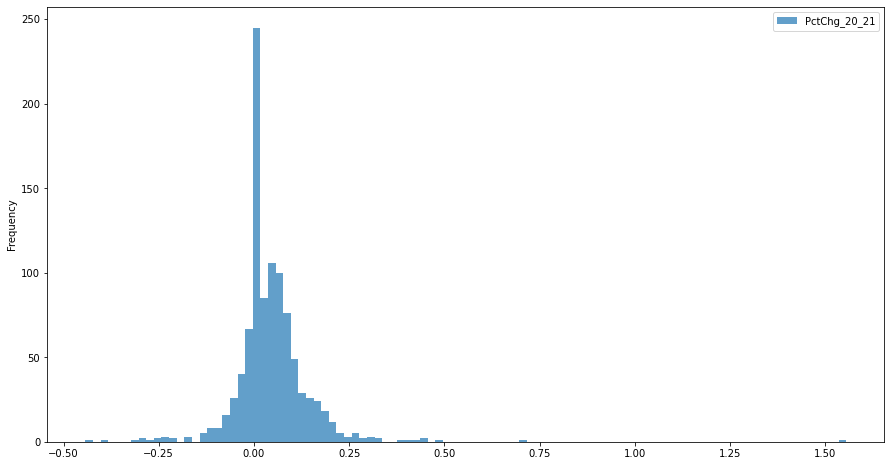

In [31]:
rcParams['figure.figsize'] = 15, 8

# presenting the results in a histogram 
PctChg_20_21['R1 POINTS_21'].plot.hist(by='RE POINTS_21', alpha=0.7, bins = 100, legend='PctChg_20_21', label='PctChg_20_21' )

Above histogram shows distibution of the changes between 2020 and 2021. We can see cca 240 courses with a with no changes and fair amount of changes with increase in CAO required in round 1.  

In [32]:
# calculating the diff beetwen 2019 and 2021
PctChg_19_21 = allcourses[['R1 POINTS_19', 'R1 POINTS_21']].pct_change(axis=1, fill_method='pad')
PctChg_19_21

,R1 POINTS_19,R1 POINTS_21
COURSE CODE,,
AC120,NaN,0.256410
AC137,NaN,0.075397
AD101,NaN,NaN
AD102,NaN,NaN
AD103,NaN,NaN
...,...,...
WD211,NaN,-0.018182
WD212,NaN,-0.043796
WD230,NaN,-0.157509


<AxesSubplot:ylabel='Frequency'>

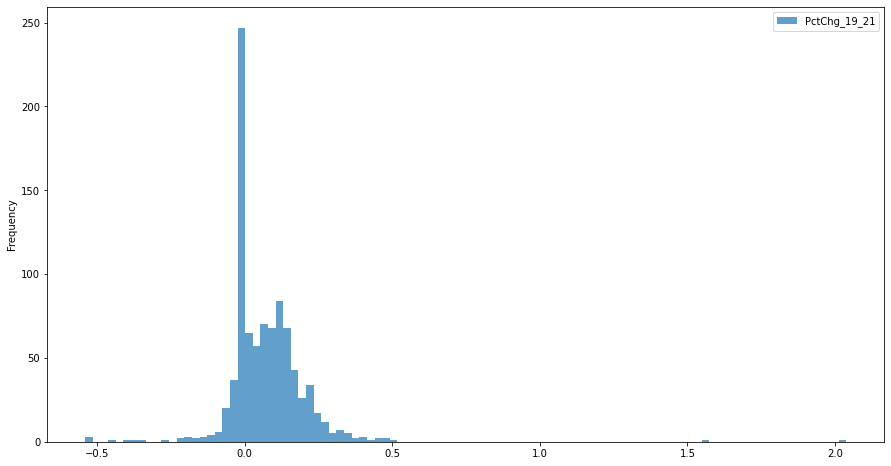

In [33]:
# presenting the results in a histogram 
PctChg_19_21['R1 POINTS_21'].plot.hist(by='RE POINTS_21', alpha=0.7, bins = 100, legend='PctChg_20_21', label='PctChg_19_21' )

Above histogram shows distibution of the changes between 2019 and 2021. Same as for previous plot, We can see cca 240 courses with a with no changes and fair amount of changes with increase in CAO required in round 1.  

In [34]:
# sorting the courses according to the highers increase in CAO points from 2020-2021
PctChg_20_21.sort_values('R1 POINTS_21', ascending=False, inplace=True)
PctChg_20_21

,R1 POINTS_20,R1 POINTS_21
COURSE CODE,,
TL801,NaN,1.555160
GA984,NaN,0.711268
DL837,NaN,0.482587
TR028,NaN,0.456140
SG254,NaN,0.453333
...,...,...
WD148,NaN,NaN
WD152,NaN,NaN
WD200,NaN,NaN


In [35]:
# sorting the courses according to the highers increase in CAO points from 2019-2021
PctChg_19_21.sort_values('R1 POINTS_21', ascending=False, inplace=True)
PctChg_19_21

,R1 POINTS_19,R1 POINTS_21
COURSE CODE,,
GA283,NaN,2.038462
TL801,NaN,1.555160
LC392,NaN,0.511521
LC265,NaN,0.486567
TR028,NaN,0.469027
...,...,...
TU995,NaN,NaN
TU996,NaN,NaN
TU997,NaN,NaN


<AxesSubplot:xlabel='COURSE CODE'>

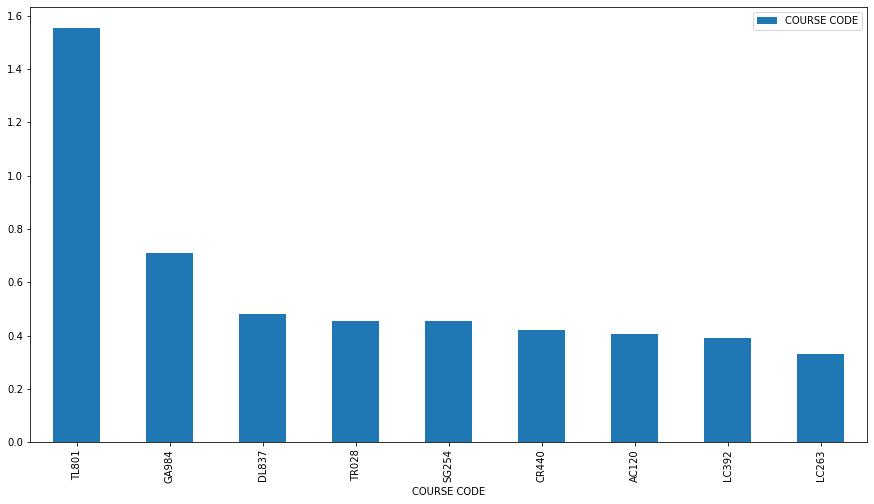

In [36]:
# plotting the first 10 courses with highers increase in CAO points required between 2020-2021
PctChg_20_21[0:9].plot.bar(y ='R1 POINTS_21', legend='COURSE CODE', label='COURSE CODE')

<AxesSubplot:xlabel='COURSE CODE'>

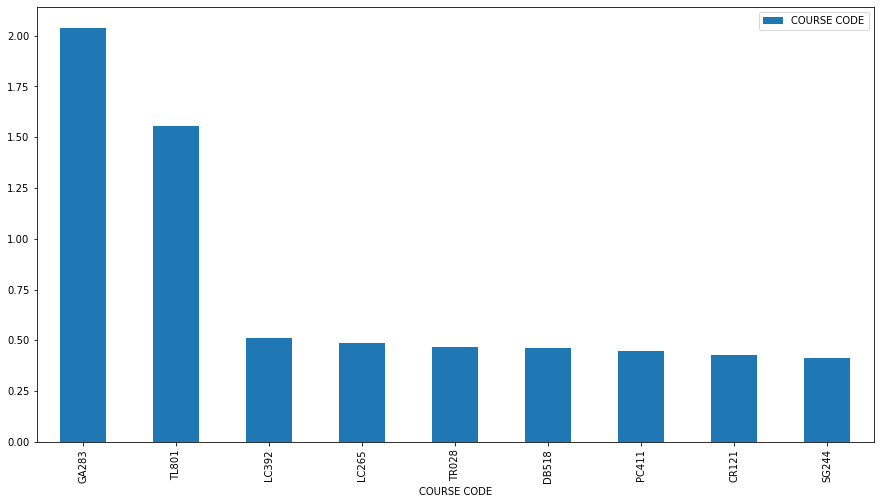

In [37]:
# plotting the first 10 courses with highers increase in CAO points required between 2019-2021
PctChg_19_21[0:9].plot.bar(y ='R1 POINTS_21', legend='COURSE CODE', label='COURSE CODE')

## References
1. Central Applications Office Ltd. (2021). Points Required for Entry to 2021 Courses. CAO. Retrieved October 16, 2021, from https://www.cao.ie/index.php?page=points&p=2021&bb=points 
2. Python Requests Module. (1999–2021). W3Schools. Retrieved October 16, 2021, from https://www.w3schools.com/python/module_requests.asp
3. Python read website data line by line when available. (2013, June 1). Stack Overflow. Retrieved October 16, 2021, from https://stackoverflow.com/questions/16870648/python-read-website-data-line-by-line-when-available
4. Python Software Foundation. (2001–2021). re — Regular expression operations — Python 3.10.0 documentation. Python. Retrieved October 16, 2021, from https://docs.python.org/3/library/re.html#re.match
5. TypeError: can’t use a string pattern on a bytes-like object in re.findall(). (2015, June 21). Stack Overflow. Retrieved October 16, 2021, from https://stackoverflow.com/questions/31019854/typeerror-cant-use-a-string-pattern-on-a-bytes-like-object-in-re-findall
6. Real Python. (2021, June 7). Regular Expressions: Regexes in Python (Part 2). Retrieved October 30, 2021, from https://realpython.com/regex-python-part-2/
7. how to write and append loop output in a csv file using python. (2019, February 25). Stack Overflow. Retrieved October 30, 2021, from https://stackoverflow.com/questions/54868247/how-to-write-and-append-loop-output-in-a-csv-file-using-python
8. How to hyperlink in a Jupyter notebook? (2018, March 28). Stack Overflow. Retrieved October 30, 2021, from https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook
9. Table Comparing Characters in Windows-1252, ISO-8859-1, ISO-8859-15. (n.d.). I18nQA.Com. Retrieved October 30, 2021, from http://www.i18nqa.com/debug/table-iso8859-1-vs-windows-1252.html
10. Real Python. (2021, February 27). Unicode & Character Encodings in Python: A Painless Guide. Retrieved November 13, 2021, from https://realpython.com/python-encodings-guide/#whats-a-character-encoding
11. Python RegEx. (1999–2021). W3schools. Retrieved November 14, 2021, from https://www.w3schools.com/python/python_regex.asp
12. datetime — Basic date and time types — Python 3.10.0 documentation. (2001-2021). Python. Retrieved November 23, 2021, from https://docs.python.org/3/library/datetime.html
13. pandas.read_excel — pandas 1.3.4 documentation. (n.d.). Pandas. Retrieved November 24, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
14. How to find and replace the character “*” in Excel. (2011, August 5). Super User. Retrieved November 25, 2021, from https://superuser.com/questions/486297/how-to-find-and-replace-the-character-in-excel
15. How to match “anything up until this sequence of characters” in a regular expression? | Newbedev. (n.d.). NewbeDEV. Retrieved November 14, 2021, from https://newbedev.com/how-to-match-anything-up-until-this-sequence-of-characters-in-a-regular-expression
16. Renaming column names in Pandas. (2012, July 5). Stack Overflow. Retrieved November 27, 2021, from https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
17. pandas.concat — pandas 1.3.4 documentation. (n.d.). Pandas. Retrieved November 27, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.concat.html
18. pandas.DataFrame.drop_duplicates — pandas 1.3.4 documentation. (n.d.). Pandas. Retrieved November 29, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html
19. Code Faster with Line-of-Code Completions, Cloudless Processing. (n.d.). Kite. Retrieved November 29, 2021, from https://www.kite.com/python/answers/how-to-remove-rows-in-a-pandas-dataframe-with-duplicate-indices-in-python
20. pandas.DataFrame.join — pandas 1.3.4 documentation. (n.d.). Pandas. Retrieved November 30, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
21. pandas.DataFrame.join — pandas 1.3.4 documentation. (n.d.). Pandas. Retrieved November 30, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html
22. Merge, join, concatenate and compare — pandas 1.3.4 documentation. (n.d.). Pandas. Retrieved November 30, 2021, from https://pandas.pydata.org/docs/user_guide/merging.html
23. Independent.ie Newsdesk. (2021, September 3). Leaving Cert Results: How 2021 grades compare to previous years – and a reminder of the 2020 CAO points. Independent. Retrieved December 4, 2021, from https://www.independent.ie/irish-news/education/leaving-cert-how-2021-grades-compare-to-previous-years-and-a-reminder-of-the-2020-cao-points-40814264.html
24. McGuire, P. (2021, September 7). CAO breakdown: Points reach record highs. The Irish Times. Retrieved December 4, 2021, from https://www.irishtimes.com/news/education/cao-breakdown-points-reach-record-highs-1.4667521
25. How to find Percentage Change in pandas. (2019, September 29). Kanoki. Retrieved December 4, 2021, from https://kanoki.org/2019/09/29/how-to-find-percentage-change-in-pandas/
26. pandas.Series.plot.hist — pandas 1.3.4 documentation. (n.d.). Pandas. Retrieved December 4, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.hist.html#pandas.Series.plot.hist
27. pandas.DataFrame.rank — pandas 1.3.4 documentation. (n.d.). Pandas. Retrieved December 4, 2021, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

## End